In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
# Import custom libraries
import warnings
import sys
import os

# Importamos lo necesario para trabajar con consultas SQL

from pandasql import sqldf

# Definir función de consulta
pysqldf = lambda q: sqldf(q, globals())

### CARGA DE LOS DATOS

In [159]:
url = 'https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/raw/survey_ready.xlsx'
df = pd.read_excel(url, na_values='#N/D')

In [160]:
df

,id_empleado,rango_edad,genero,estado_civil,estudios,departamento,area,puesto,antigüedad,trabajo_varias_areas,...,notas_capacitacion,tiempo_puesto,meses_ultima_promocion,meses_jefe_actual,considerado_abandono_empresa,motivo_abandono_empresa,mejoras_para_reduccion_rotacion,factores_externos_influencia,factores_externos_opciones,comentarios_experiencia_empresa
0,InMex001,40-44,Femenino,Casado/a,Licenciatura,Operaciones,Operaciones,Contraloria y finanzas,70,No,...,NaN,70,NaN,48,Si,Me siento frustrada porque me exigen resultado...,Considero que seria importante establecer limi...,Si,"Oferta laboral en otras empresas, Salario poco...","El ambiente laboral, los constantes cambios de..."
1,InMex002,30-34,Masculino,Soltero/a,Posgrado,Operaciones,Operaciones,Gerente,109,Si,...,NaN,48,48.0,84,Si,Asumir responsabilidades sin falta de capacita...,Delimitar alcances dentro de las funsiones de ...,Si,"Oferta laboral en otras empresas, Distancia en...","Conflicto de intereses entre la direccion, fal..."
2,InMex003,30-34,Masculino,Soltero/a,Licenciatura,Masa,Tecnica,Metrologo,29,No,...,4.0,29,NaN,5,Si,Falta de reconocimiento y recompensa (no monet...,Reconocimiento con premios aunque no sean mone...,Si,"Oferta laboral en otras empresas, Distancia en...",En general no es malo el trabajo solo que la m...
3,InMex004,30-34,Masculino,Soltero/a,Licenciatura,Mediciones Especiales,Tecnica,Metrologo,34,Si,...,4.0,9,9.0,9,Si,Para obtener un salario mayor al que recibo.,"Mejores salarios, tomar en cuenta la experienc...",Si,"Oferta laboral en otras empresas, Condiciones ...",El ambiente laboral me agrada bastante y creo ...
4,InMex005,45-49,Femenino,Soltero/a,Licenciatura,Tecnica,Tecnica,Gerente,254,Si,...,NaN,72,72.0,72,No,NaN,Mejoras en los salarios,No,NaN,
5,InMex006,30-34,Masculino,Soltero/a,Licenciatura,Comercial,Comercial,Asesor comercial,34,Si,...,5.0,28,28.0,22,No,NaN,"Mejores salarios, definicion de funciones y re...",No,NaN,
6,InMex007,25-29,Masculino,Soltero/a,Licenciatura,Masa,Tecnica,Metrologo,8,No,...,5.0,8,NaN,8,No,NaN,Contratacion de personal competente,No,NaN,
7,InMex008,45-49,Femenino,Soltero/a,Licenciatura,Calidad,Calidad,Gerente,252,Si,...,NaN,84,84.0,60,No,N/a,Mejor observacion en el proceso de contratacio...,Si,"Responsabilidades familiares, Condiciones econ...",En general estoy agusto con las actividades qu...
8,InMex009,40-44,Masculino,Casado/a,Tecnico,Masa,Tecnica,Metrologo,119,No,...,5.0,119,NaN,9,No,,Mas prestaciones,No,NaN,Ninguna
9,InMex010,30-34,Masculino,Soltero/a,Licenciatura,Kaye,Tecnica,Jefe de laboratorio,36,Si,...,4.0,8,3.0,36,Si,Por crecimiento profesional y economico,"Incluir mas prestaciones como caja de ahorro, ...",Si,"Distancia entre casa y trabajo, Responsabilida...",Considero importante que se tome en cuenta la ...


## BUSINESS ANALYTICS

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_empleado                      41 non-null     object 
 1   rango_edad                       41 non-null     object 
 2   genero                           41 non-null     object 
 3   estado_civil                     41 non-null     object 
 4   estudios                         41 non-null     object 
 5   departamento                     41 non-null     object 
 6   area                             41 non-null     object 
 7   puesto                           41 non-null     object 
 8   antigüedad                       41 non-null     int64  
 9   trabajo_varias_areas             41 non-null     object 
 10  numero_areas                     41 non-null     int64  
 11  carrera                          41 non-null     object 
 12  numero_empresas         

In [166]:
df.dtypes[df.dtypes == 'object'].index

Index(['id_empleado', 'rango_edad', 'genero', 'estado_civil', 'estudios',
       'departamento', 'area', 'puesto', 'trabajo_varias_areas', 'carrera',
       'valoracion_companeros', 'evaluaciones_desempeno_ult_ano',
       'salario_mensual', 'aumento_salario_ult_dos_anos',
       'viajes_mensuales_laborales', 'capacitaciones',
       'considerado_abandono_empresa', 'motivo_abandono_empresa',
       'mejoras_para_reduccion_rotacion', 'factores_externos_influencia',
       'factores_externos_opciones', 'comentarios_experiencia_empresa'],
      dtype='object')

#### ANÁLISIS DE NULOS

In [168]:
df.isna().sum().sort_values(ascending = False)

meses_ultima_promocion             21
factores_externos_opciones         16
notas_capacitacion                  8
motivo_abandono_empresa             3
id_empleado                         0
estudios                            0
estado_civil                        0
genero                              0
rango_edad                          0
departamento                        0
area                                0
puesto                              0
antigüedad                          0
satisfaccion_entorno                0
satisfaccion_puesto_actual          0
implicacion_puesto                  0
valoracion_companeros               0
trabajo_varias_areas                0
numero_areas                        0
carrera                             0
numero_empresas                     0
horas_extras_semanales              0
horas_trabajo_semanal               0
evaluaciones_desempeno_ult_ano      0
satisfaccion_laboral_personal       0
viajes_mensuales_laborales          0
salario_mens

#### EDA VARIABLES CATEGÓRICAS

In [ ]:
# Separar los posibles valores de la columna 'factores_externos_opciones' en una lista
opciones_posibles = [
    'Oferta laboral en otras empresas',
    'Distancia entre casa y trabajo',
    'Falta de transporte adecuado',
    'Salario poco competitivo en el mercado',
    'Responsabilidades familiares',
    'Condiciones económicas generales (inflación, costo de vida, etc.)',
    'Falta de oportunidades de crecimiento profesional',
    'Ambiente laboral',
    'Factores personales (salud, estrés, etc.)',
    'Otro'
]

df['factores_externos_opciones'] = df['factores_externos_opciones'].fillna('')

df_factores_opciones_dummies = df['factores_externos_opciones'].str.get_dummies(sep=', ')

for opcion in opciones_posibles:
     if opcion not in df_factores_opciones_dummies.columns:
        df_factores_opciones_dummies[opcion] = 0 
        
# Unir las nuevas columnas binarias al DataFrame original
df = pd.concat([df, df_factores_opciones_dummies], axis=1)

In [169]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import ceil

def graficos_eda_categoricos(cat_df):
    # Calculamos el número de filas necesarias (2 gráficos por fila)
    columnas = cat_df.columns
    n_vars = len(columnas)
    filas = ceil(n_vars / 2)

    # Creamos subplots
    fig = make_subplots(rows=filas, cols=2, subplot_titles=columnas)

    for i, col in enumerate(columnas):
        row = (i // 2) + 1
        col_position = (i % 2) + 1

        # Obtenemos los conteos de cada categoría
        conteos = cat_df[col].value_counts()

        # Añadimos el gráfico de barras horizontal
        fig.add_trace(
            go.Bar(
                x=conteos.values,
                y=conteos.index,
                orientation='h',
                name=col
            ),
            row=row,
            col=col_position
        )

    fig.update_layout(
        height=filas * 400,
        width=1000,
        title_text="Distribución de Variables Categóricas",
        showlegend=False
    )

    fig.update_annotations(font_size=12, font=dict(color="black"))
    fig.show()


In [180]:
df_cat_inf_personal = df[['rango_edad', 'genero', 'estado_civil', 'estudios', 'carrera']]

df_cat_trabajo = df[['departamento', 'area', 'puesto', 'trabajo_varias_areas', 
       'salario_mensual','evaluaciones_desempeno_ult_ano', 'viajes_mensuales_laborales', 'aumento_salario_ult_dos_anos', 
       'considerado_abandono_empresa', 'factores_externos_influencia']]

df_cat_rel = df[['valoracion_companeros', 'capacitaciones']]

In [181]:
graficos_eda_categoricos(df_cat_inf_personal)

In [134]:
graficos_eda_categoricos(df_cat_trabajo)

In [182]:
graficos_eda_categoricos(df_cat_rel)

#### EDA VARIABLES NUMÉRICAS

In [186]:
# Análisis de las variables numéricas

df_num = df.select_dtypes('number')
df_num.columns

Index(['antigüedad', 'numero_areas', 'numero_empresas', 'satisfaccion_entorno',
       'satisfaccion_puesto_actual', 'implicacion_puesto',
       'satisfaccion_laboral_personal', 'horas_trabajo_semanal',
       'horas_extras_semanales', 'porciento_aumento_salarial',
       'tiempo_traslado_diario', 'notas_capacitacion', 'tiempo_puesto',
       'meses_ultima_promocion', 'meses_jefe_actual', 'Ambiente laboral',
       'Condiciones economicas generales', 'Distancia entre casa y trabajo',
       'Factores personales',
       'Falta de oportunidades de crecimiento profesional',
       'Falta de transporte adecuado', 'Oferta laboral en otras empresas',
       'Otro', 'Responsabilidades familiares',
       'Salario poco competitivo en el mercado',
       'Condiciones económicas generales (inflación, costo de vida, etc.)',
       'Factores personales (salud, estrés, etc.)'],
      dtype='object')

In [187]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [188]:
estadisticos_cont(df_num)

,count,mean,median,std,min,25%,50%,75%,max
antigüedad,41.0,61.658537,32.00,70.214176,4.0,17.0,32.00,89.0,254.0
numero_areas,41.0,1.707317,1.00,1.006079,1.0,1.0,1.00,2.0,5.0
numero_empresas,41.0,2.878049,3.00,1.964626,0.0,2.0,3.00,3.0,8.0
satisfaccion_entorno,41.0,3.536585,4.00,1.027073,1.0,3.0,4.00,4.0,5.0
satisfaccion_puesto_actual,41.0,3.731707,4.00,1.072949,1.0,3.0,4.00,5.0,5.0
implicacion_puesto,41.0,3.975610,4.00,0.907959,2.0,3.0,4.00,5.0,5.0
satisfaccion_laboral_personal,41.0,3.658537,4.00,1.039465,1.0,3.0,4.00,4.0,5.0
horas_trabajo_semanal,41.0,44.146341,45.00,5.701145,25.0,41.0,45.00,48.0,55.0
horas_extras_semanales,41.0,1.585366,1.00,2.085373,0.0,0.0,1.00,2.0,10.0
porciento_aumento_salarial,41.0,7.069512,0.00,11.192603,0.0,0.0,0.00,19.0,30.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada


In [12]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [13]:
df.abandono.value_counts(normalize = True) * 100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

---
<br/><br/>

### ¿Hay un perfil tipo de empleado que deja la empresa?

In [14]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

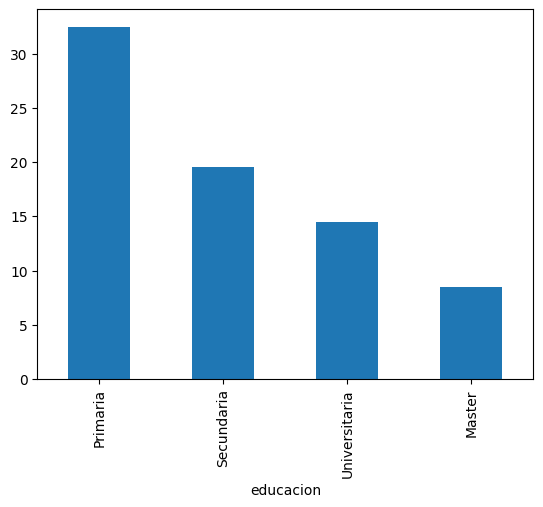

In [15]:
# Analisis por educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

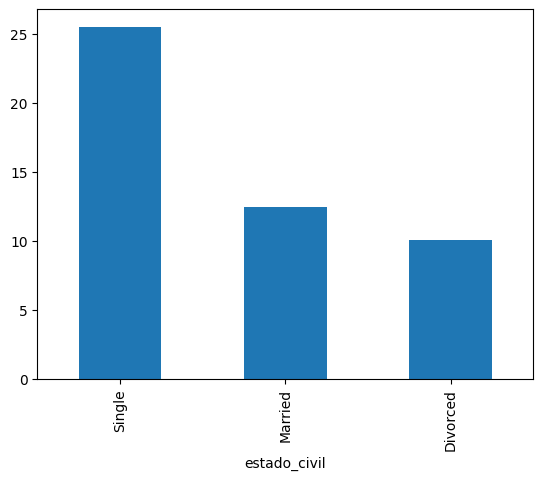

In [16]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

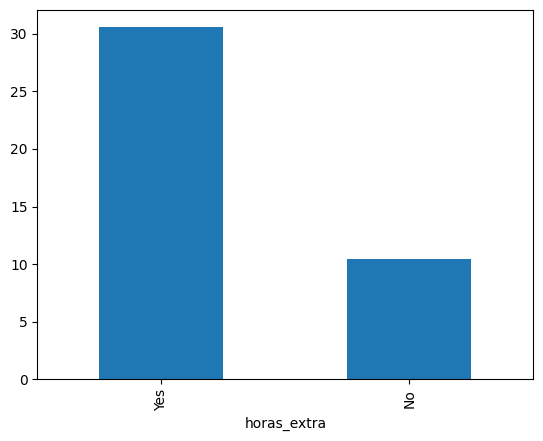

In [17]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

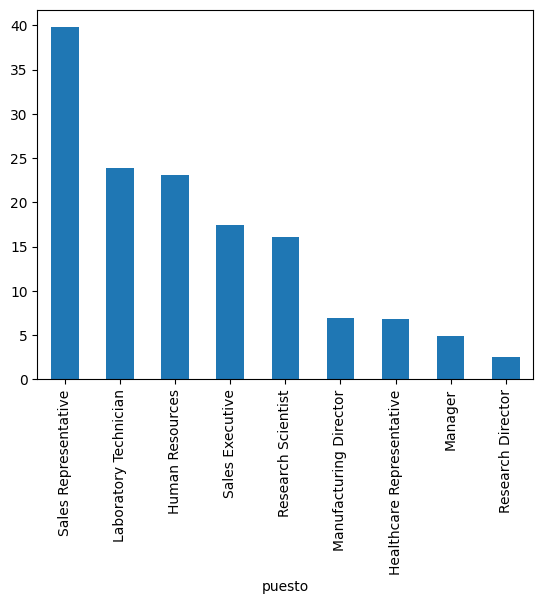

In [18]:
# Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

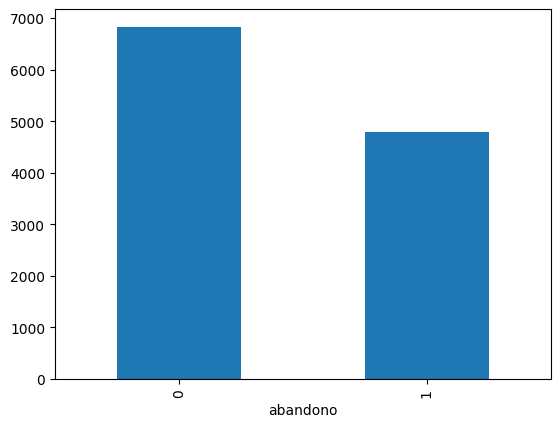

In [19]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

Conclusiones:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

---
<br/><br/>

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [20]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [21]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


---
<br/><br/>

### ¿Cúanto nos ha costado este problema en el último año?

In [22]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

np.float64(2719005.912)

---
<br/><br/>

### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [23]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

np.float64(368672.688)

---
<br/><br/>

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [24]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


---
<br/><br/>

### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [25]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

Ahora vamos a estimar cuántos se nos irán este año

In [26]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [27]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada